In [135]:
import pandas as pd
import numpy as np

# Load the dataset
df1 = pd.read_csv("new_upper_down.csv")
df0 = pd.read_csv("new_right_left.csv")

df0['Result'] = df0['Result'].replace({0: 2, 1: 3})
df = pd.concat([df1,df0])
df.head()

,AnalogValue,Density,Amplitude,Result
0,881,887,1.08,0
1,909,903,1.11,0
2,889,890,1.09,0
3,898,903,1.10,0
4,901,898,1.10,0


In [136]:
# Separate features and target
features = df[["AnalogValue", "Density", "Amplitude"]]
target = df["Result"]


In [137]:
X = features
X.head()

,AnalogValue,Density,Amplitude
0,881,887,1.08
1,909,903,1.11
2,889,890,1.09
3,898,903,1.10
4,901,898,1.10


In [138]:
y = np.array(target)

In [139]:
y

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

In [140]:
print("Shape of the X_train:", X.shape)
print("Shape of the y_train:", y.shape)



Shape of the X_train: (8000, 3)
Shape of the y_train: (8000,)


In [141]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [142]:
print("Shape of the X_train:", X.shape)
print("Shape of the y_train:", y.shape)



Shape of the X_train: (8000, 3)
Shape of the y_train: (8000,)


In [143]:
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)


In [144]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [145]:

# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [152]:
print("Shape of the X_train:", X_train.shape)
print("Shape of the y_train:", X_test.shape)
print("Shape of the X_test:", y_train.shape)
print("Shape of the y_test:", y_test.shape)


Shape of the X_train: (6400, 3)
Shape of the y_train: (1600, 3)
Shape of the X_test: (6400,)
Shape of the y_test: (1600,)


In [147]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

In [149]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


svm_model = SVC()  # For SVM
tree_model = DecisionTreeClassifier()  # For Decision Tree
svm_model.fit(X_train, y_train)  # X_train is the training data, y_train is the corresponding labels
tree_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)  # X_test is the test data
tree_predictions = tree_model.predict(X_test)
from sklearn.metrics import accuracy_score

svm_accuracy = accuracy_score(y_test, svm_predictions)  # y_test is the true labels for the test data
tree_accuracy = accuracy_score(y_test, tree_predictions)


In [151]:
tree_accuracy

0.43625

In [32]:
y_train = np.reshape(y_train, (y_train.shape[0], 1,y_train.shape[1] ))

y_test = np.reshape(y_test, (y_test.shape[0], 1,y_test.shape[1] ))


In [33]:
print("Shape of the X_train:", X_train.shape)
print("Shape of the y_train:", y_train.shape)
print("Shape of the X_test:", X_test.shape)
print("Shape of the y_test:", y_test.shape)


Shape of the X_train: (6400, 3, 1)
Shape of the y_train: (6400, 1, 4)
Shape of the X_test: (1600, 3, 1)
Shape of the y_test: (1600, 1, 4)


(320, 3, 1)

In [34]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Conv1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

my_model1 = Sequential()
my_model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 4)))
# my_model1.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
my_model1.add(LSTM(units=64, return_sequences=True))
my_model1.add(Dropout(0.2))

my_model1.add(LSTM(units=64, return_sequences=True))
my_model1.add(Dropout(0.2))

my_model1.add(Dense(units=128, activation='relu'))
my_model1.add(Dense(units=64, activation='relu'))
my_model1.add(Dense(units=4, activation='sigmoid'))

my_model1.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

my_model1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 1, 32)             128       
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             24832     
                                                                 
 dropout_2 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_3 (LSTM)               (None, 1, 64)             33024     
                                                                 
 dropout_3 (Dropout)         (None, 1, 64)             0         
                                                                 
 dense_3 (Dense)             (None, 1, 128)            8320      
                                                                 
 dense_4 (Dense)             (None, 1, 64)            

In [35]:
my_model1.fit(X_train, y_train, epochs = 50)

Epoch 1/50
200/200 [==============================] - 7s 6ms/step - loss: 1.2538 - accuracy: 0.4016
Epoch 2/50
200/200 [==============================] - 1s 6ms/step - loss: 1.1552 - accuracy: 0.4666
Epoch 3/50
200/200 [==============================] - 1s 6ms/step - loss: 1.1349 - accuracy: 0.4798
Epoch 4/50
200/200 [==============================] - 1s 6ms/step - loss: 1.1313 - accuracy: 0.4827
Epoch 5/50
200/200 [==============================] - 1s 6ms/step - loss: 1.1256 - accuracy: 0.4902
Epoch 6/50
200/200 [==============================] - 1s 6ms/step - loss: 1.1318 - accuracy: 0.4825
Epoch 7/50
200/200 [==============================] - 1s 6ms/step - loss: 1.1251 - accuracy: 0.4891
Epoch 8/50
200/200 [==============================] - 1s 6ms/step - loss: 1.1169 - accuracy: 0.4959
Epoch 9/50
200/200 [==============================] - 1s 6ms/step - loss: 1.1239 - accuracy: 0.4875
Epoch 10/50
200/200 [==============================] - 1s 6ms/step - loss: 1.1184 - accuracy: 0.4919

In [38]:
from sklearn.svm import SVC
model = SVC(max_iter= 100)

In [39]:
model.fit(X_train_scaled, y_train)

SVC(max_iter=100)

In [40]:
model.score(X_test_scaled, y_test)

0.7375

In [41]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression model
model = LogisticRegression(max_iter= 1000)

# Train the model using your training data
model.fit(X_train_scaled, y_train)

# Make predictions on new data
y_pred = model.predict(X_test)
model.score(X_test, y_test)


C:\Users\UNKNOWN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\UNKNOWN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.225

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the Decision Tree Classifier model
model = DecisionTreeClassifier()

# Train the model using your training data
model.fit(X_train, y_train)

# Make predictions on new data
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.7875

In [37]:
upper = df1.iloc[:2000,:]
upper.head()

,AnalogValue,Density,Amplitude,Result
0,881,887,1.08,0
1,909,903,1.11,0
2,889,890,1.09,0
3,898,903,1.10,0
4,901,898,1.10,0


In [38]:
upper.tail()

,AnalogValue,Density,Amplitude,Result
1995,811,812,0.99,0
1996,862,854,1.05,0
1997,961,959,1.17,0
1998,851,848,1.04,0
1999,720,718,0.88,0


In [39]:
down = df1.iloc[2000:4000, :]
down.tail()

,AnalogValue,Density,Amplitude,Result
3995,971,972,1.19,1
3996,976,974,1.19,1
3997,988,989,1.21,1
3998,995,990,1.21,1
3999,987,977,1.21,1


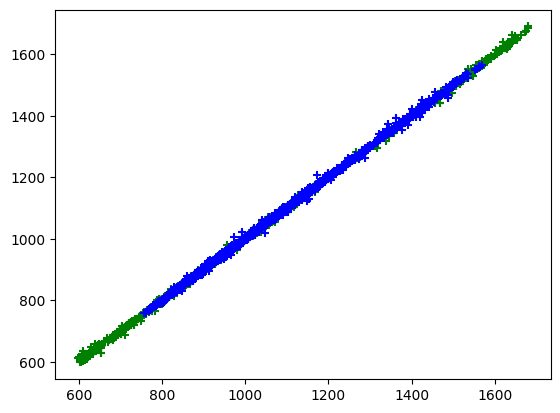

In [41]:
import matplotlib.pyplot as plt
plt.scatter(upper["AnalogValue"], upper["Density"], color = "green", marker = "+")
plt.scatter(down["AnalogValue"], down["Density"], color = "blue", marker = "+")


In [42]:
from sklearn import datasets
iris = datasets.load_iris()
  
# X -> features, y -> label
X = iris.data
y = iris.target

In [61]:
X_train

,AnalogValue,Density,Amplitude
1467,1056,1057,1.29
1768,1211,1212,1.48
1714,1206,1214,1.47
1578,1421,1424,1.74
2958,991,997,1.21
...,...,...,...
1226,976,980,1.19
1390,1264,1264,1.54
860,837,835,1.02
3603,944,934,1.15


In [55]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3